# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook

In [3]:
sinasc = pd.read_csv('sinasc_RO_2019.csv')

sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

In [64]:
#Trasformando o indice de estcivmae
sinasc.loc[sinasc['ESTCIVMAE']==1, 'n_estcivmae'] = 'Solteira'
sinasc.loc[sinasc['ESTCIVMAE']==2, 'n_estcivmae'] = 'Casada'
sinasc.loc[sinasc['ESTCIVMAE']==3, 'n_estcivmae'] = 'Viuva'
sinasc.loc[sinasc['ESTCIVMAE']==4, 'n_estcivmae'] = 'Divorciada'
sinasc.loc[sinasc['ESTCIVMAE']==9, 'n_estcivmae'] = 'Ignorado'

<IPython.core.display.Javascript object>


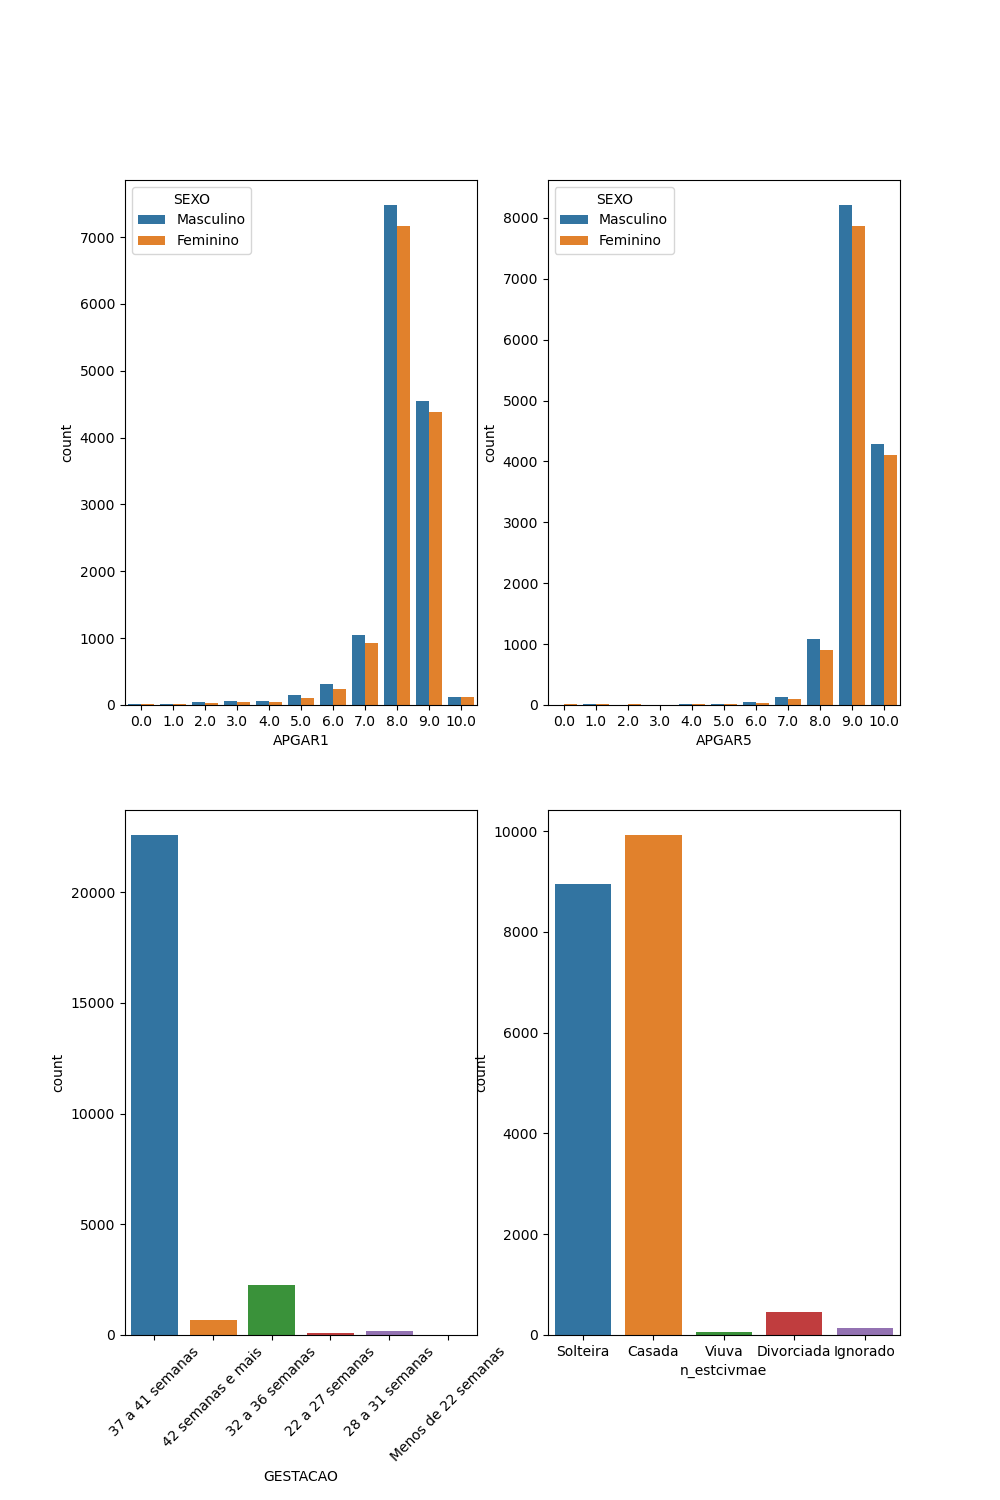

<Axes: xlabel='n_estcivmae', ylabel='count'>

In [68]:
#Preparando o quadro
plt.close('all')
plt.rc('figure', figsize=(10,15))
fig, axes = plt.subplots(2,2)

#tabelas relacionando APGAR1 e 5 com SEXO 
sns.countplot(data=sinasc, ax=axes[0,0], x='APGAR1',hue='SEXO')
sns.countplot(data=sinasc, ax=axes[0,1], x='APGAR5', hue='SEXO')

#Transformando a tabela GESTACAO em uma variavel para poder virar as legendas 45 graus
gest = sns.countplot(data=sinasc, ax=axes[1,0], x='GESTACAO') 
gest.set_xticklabels(gest.get_xticklabels(),rotation=45)

sns.countplot(data=sinasc, ax=axes[1,1], x='n_estcivmae', order=['Solteira','Casada','Viuva','Divorciada','Ignorado'])

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

In [58]:
#Trasformando o indice de CONSULTAS
sinasc.loc[sinasc['CONSULTAS']==1, 'n_CONSULTAS'] = 'Nenhuma'
sinasc.loc[sinasc['CONSULTAS']==2, 'n_CONSULTAS'] = 'de 1 a 3'
sinasc.loc[sinasc['CONSULTAS']==3, 'n_CONSULTAS'] = 'de 4 a 6'
sinasc.loc[sinasc['CONSULTAS']==4, 'n_CONSULTAS'] = '7 e mais'
sinasc.loc[sinasc['CONSULTAS']==9, 'n_CONSULTAS'] = 'Ignorado'

<IPython.core.display.Javascript object>


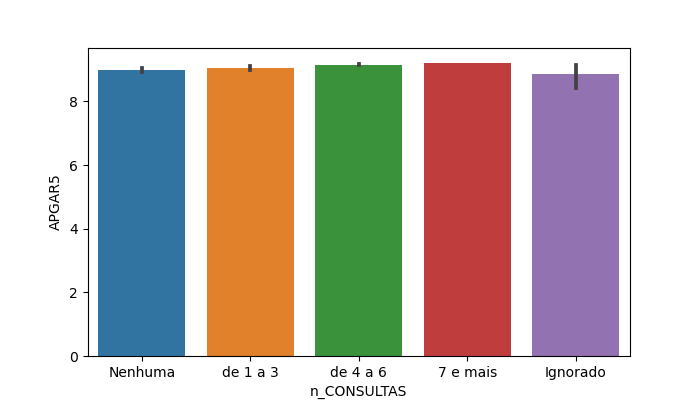

In [62]:
#Preparando o quadro
plt.close('all')
plt.rc('figure', figsize=(7,4))
fig,axes = plt.subplots(1,1)

#tabelas relacionando APGAR5 com CONSULTAS 
APGCON=sns.barplot(data=sinasc, x='n_CONSULTAS',y='APGAR5', order=['Nenhuma','de 1 a 3','de 4 a 6','7 e mais','Ignorado'])

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

<IPython.core.display.Javascript object>


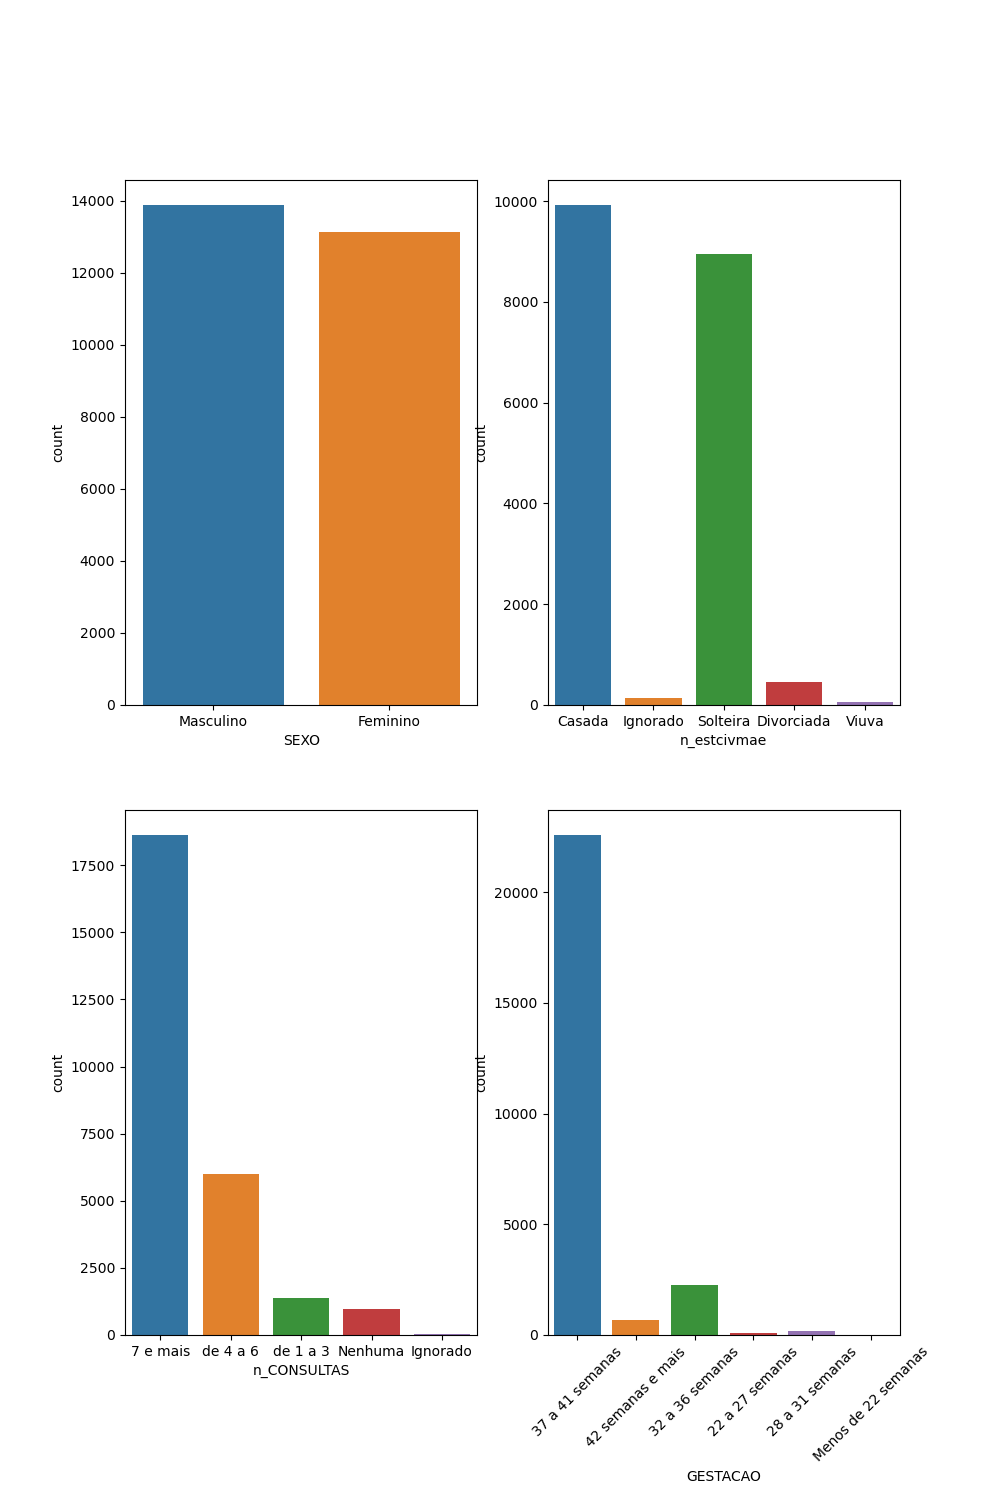

[Text(0, 0, '37 a 41 semanas'),
 Text(1, 0, '42 semanas e mais'),
 Text(2, 0, '32 a 36 semanas'),
 Text(3, 0, '22 a 27 semanas'),
 Text(4, 0, '28 a 31 semanas'),
 Text(5, 0, 'Menos de 22 semanas')]

In [74]:
#Preparando o quadro
plt.close('all')
plt.rc('figure', figsize=(10,15))
fig,axes = plt.subplots(2,2)


sns.countplot(data=sinasc, ax=axes[0,0], x='SEXO' )
sns.countplot(data=sinasc, ax=axes[0,1], x='n_estcivmae')
sns.countplot(data=sinasc, ax=axes[1,0], x='n_CONSULTAS')
GESTAC = sns.countplot(data=sinasc, ax=axes[1,1], x='GESTACAO')
GESTAC.set_xticklabels(GESTAC.get_xticklabels(),rotation=45)


<IPython.core.display.Javascript object>


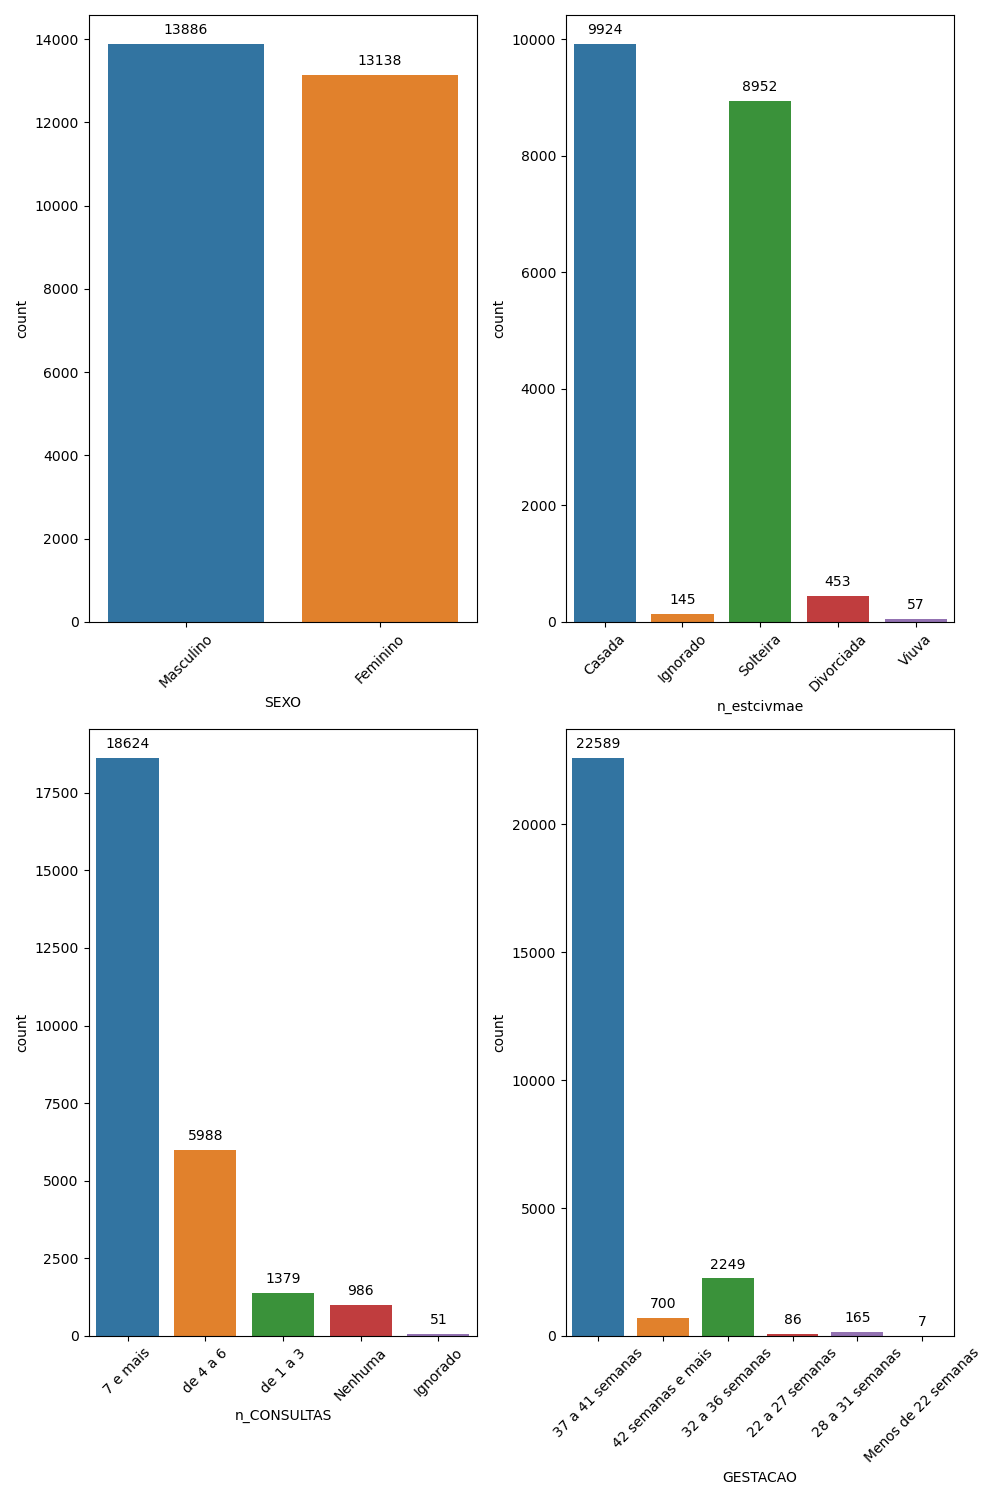

In [75]:
#plt.close('all')
#plt.rc('figure', figsize=(10,15))
#fig,axes = plt.subplots(2,2)

#plots = []
#plots.append(sns.countplot(data=sinasc, ax=axes[0,0], x='SEXO'))
#plots.append(sns.countplot(data=sinasc, ax=axes[0,1], x='n_estcivmae'))
#plots.append(sns.countplot(data=sinasc, ax=axes[1,0], x='n_CONSULTAS'))
#plots.append(sns.countplot(data=sinasc, ax=axes[1,1], x='GESTACAO'))

#Meio de mostrar o valor de cada coluna
#for plot in plots:
#    plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
#    for p in plot.patches:
#        plot.annotate(format(p.get_height(), '.0f'), 
#                      (p.get_x() + p.get_width() / 2., p.get_height()), 
#                      ha = 'center', va = 'center', 
#                      xytext = (0, 10), 
#                      textcoords = 'offset points')

#plt.tight_layout()
#plt.show()
